In [3]:
import skfda
import numpy as np
import matplotlib.pyplot as plt

In [7]:
X = np.load("X.npy")
Y = np.load("Y.npy")

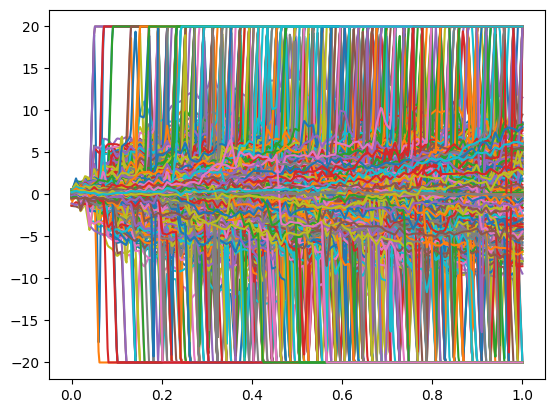

In [8]:
X = skfda.FDataGrid(data_matrix=X, grid_points=np.linspace(0, 1, 100), domain_range=(0, 1))
fig = X.plot()
plt.show()

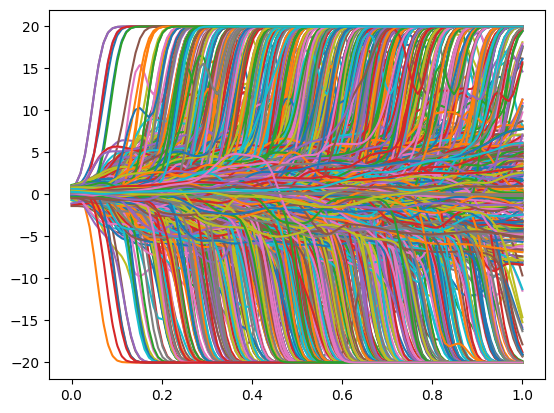

In [11]:
from skfda.preprocessing.smoothing.validation import SmoothingParameterSearch
from skfda.preprocessing.smoothing.validation import akaike_information_criterion, LinearSmootherGeneralizedCVScorer
from skfda.misc.hat_matrix import NadarayaWatsonHatMatrix
from skfda.preprocessing.smoothing import KernelSmoother

# Defining grid search
bandwidth = np.linspace(0.01, 1, 100)


# Nadaraya-Watson kernel smoother
nw = SmoothingParameterSearch(
    KernelSmoother(kernel_estimator=NadarayaWatsonHatMatrix()),
    bandwidth,
    scoring=LinearSmootherGeneralizedCVScorer(penalization_function=lambda t:1),
    param_name='kernel_estimator__bandwidth'
)


nw.fit(X)
x_opt = nw.transform(X)


fig = x_opt.plot()


plt.show()